<h1> Libraries </h1>

In [1]:
import os, sys
import numpy as np

import scipy
import moviepy.editor as mpe
from moviepy.video.io.bindings import mplfig_to_npimage

from matplotlib import pyplot as plt

%matplotlib inline

np.set_printoptions(precision=4, linewidth=100)

In [2]:
# # Run following code if you occurred error in below cell
# import imageio
# imageio.plugins.ffmpeg.download()

In [3]:
video = mpe.VideoFileClip("../Handson_BR/dataset/Video_003/Video_003.avi")
video.subclip(0,50).ipython_display(width=500)

100%|█████████▉| 350/351 [00:00<00:00, 1490.35it/s]


In [4]:
print("Video duration: {}".format(video.duration))
print("Every frame size is {s[0]} * {s[1]}".format(s=video.size))

Video duration: 113.57
Every frame size is 320 * 240


<h1> Create Matrix </h1>

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

In [5]:
def create_data_matrix_from_video(clip, fps=5, scale=50):
    return np.vstack([scipy.misc.imresize(rgb2gray(clip.get_frame(i / float(fps))).astype(int), scale).flatten() 
                      for i in range(fps * int(clip.duration))]).T

In [6]:
# Change resolution of image
scale = 100 # scale to X percent (100 means no scaling). CHANGE THIS FOR BETTER RESOLUTIONoriginal_width = video.size[1]
original_width = video.size[1]
original_height = video.size[0]
dims = (int(original_width * scale / 100), int(original_height * scale / 100))
print("Scale every frame to {d[0]} * {d[1]}".format(d=dims)) # single frame dimensions (height x width)

Scale every frame to 240 * 320


In [7]:
# Take times
fps = 100
M = create_data_matrix_from_video(video, fps, scale)

In [8]:
M.shape

(76800, 11300)

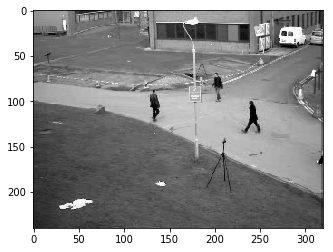

In [9]:
plt.imshow(np.reshape(M[:, 140], dims), cmap='gray')
plt.show()

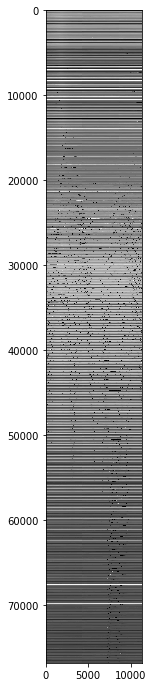

In [10]:
plt.figure(figsize=(12, 12))
plt.imshow(M, cmap='gray')
plt.show()

<h1> Background Removal </h1>

In [11]:
from scipy.sparse.linalg import svds

In [12]:
M = M.astype(float)
U, Sigma, Vt = svds(M, k=2)

In [13]:
U.shape, Sigma.shape, Vt.shape

((76800, 2), (2,), (2, 11300))

In [14]:
low_rank = U @ np.diag(Sigma) @ Vt # low_rank is background

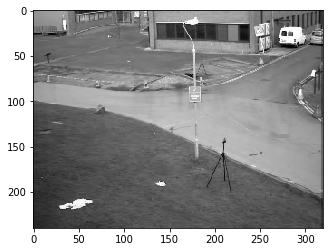

In [15]:
plt.imshow(np.reshape(low_rank[:, 140], dims), cmap='gray')
plt.show()

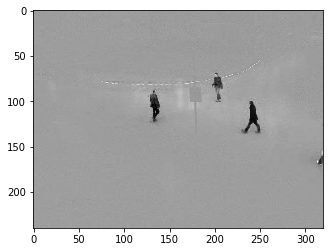

In [16]:
plt.imshow(np.reshape(M[:, 140] - low_rank[:, 140], dims), cmap='gray')
plt.show()

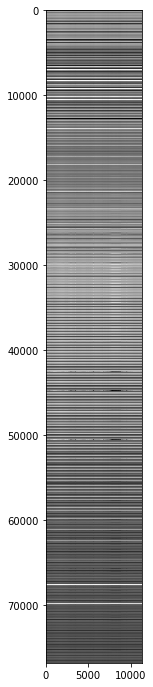

In [17]:
plt.figure(figsize=(12, 12))
plt.imshow(low_rank, cmap='gray')
plt.show()

In [18]:
low_rank.shape

(76800, 11300)

In [19]:
people = M - low_rank

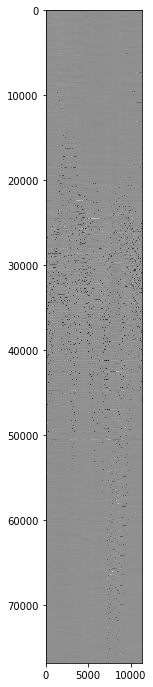

In [20]:
plt.figure(figsize=(12, 12))
plt.imshow(people, cmap='gray');

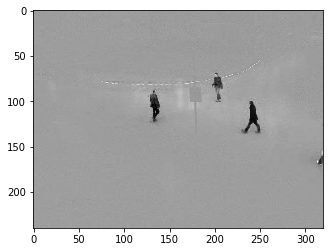

In [21]:
plt.imshow(np.reshape(people[:, 140], dims), cmap='gray');

<h1> Make Video </h1>

In [22]:
people_frames = people.reshape(dims + (-1,))
people_frames.shape

(240, 320, 11300)

[MoviePy] >>>> Building video ./people_100.mp4
[MoviePy] Writing video ./people_100.mp4


100%|█████████▉| 1100/1101 [00:50<00:00, 17.69it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: ./people_100.mp4 



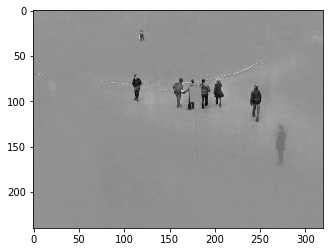

In [23]:
# this takes a while
fig, ax = plt.subplots()
def make_frame(t):
    ax.clear()
    ax.imshow(people_frames[..., int(t*fps)], cmap="gray")
    return mplfig_to_npimage(fig)

animation = mpe.VideoClip(make_frame, duration=int((video.duration-1)*0.1))
animation.write_videofile('./people_%s.mp4'%str(scale), fps=fps)

In [24]:
video = mpe.VideoFileClip("./people_%s.mp4"%str(scale))
video.ipython_display(width=500)

100%|█████████▉| 1100/1101 [00:00<00:00, 1229.98it/s]


### Reference
- https://zulko.github.io/moviepy/getting_started/working_with_matplotlib.html